# 신용카드 사기 거래 탐지 AI 경진대회

`-` 월간데이콘23 | 비지도 학습 | 이상 탐지 | 정형 | macro-f1 

## 패키지 import

In [342]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm

warnings.filterwarnings(action='ignore')

In [2]:
os.getcwd()

'C:\\Users\\Jaesu\\github_desktop\\Dacon-credit-card-fraud-detection'

In [2]:
train = pd.read_csv('./Data/train.csv')
valid = pd.read_csv('./Data/val.csv')
test = pd.read_csv('./Data/test.csv')
submission = pd.read_csv('./Data/sample_submission.csv')

`-` train 데이터에서 무작위로 샘플링한 데이터가 valid 데이터이다

`-` label이 valid 데이터에만 있어서 우선 valid 데이터를 탐색하겠다

In [9]:
valid.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,...,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,142549.840138,0.004967,0.002014,0.001414,0.001893,-0.003969,-0.017730,0.005556,0.009023,-0.004905,...,0.001224,0.001490,0.001355,0.002284,0.000520,-0.000520,-0.000265,0.924010,0.119916,0.001054
std,82252.851474,1.930640,1.605198,1.499749,1.405139,1.335147,1.292214,1.165132,1.103538,1.090843,...,0.721350,0.588076,0.603181,0.526864,0.484804,0.394235,0.304284,3.347555,0.558246,0.032449
min,10.000000,-29.516123,-38.305310,-30.177317,-5.071241,-21.577019,-16.172614,-31.197329,-26.278007,-9.462573,...,-8.555808,-25.356744,-2.807897,-6.035054,-1.596493,-9.793568,-8.364853,-0.307413,-0.994878,0.000000
25%,71260.000000,-0.915525,-0.598053,-0.873022,-0.852444,-0.698010,-0.774920,-0.546290,-0.210941,-0.642760,...,-0.542624,-0.160418,-0.352310,-0.322098,-0.328638,-0.071787,-0.052361,-0.226927,-0.357884,0.000000
50%,142683.500000,0.023586,0.075470,0.175784,-0.021619,-0.052780,-0.280742,0.046280,0.022622,-0.066623,...,0.008401,-0.011372,0.040076,0.016684,-0.049583,0.000488,0.012138,0.005589,0.002156,0.000000
75%,213612.750000,1.315578,0.803463,1.011563,0.739044,0.598712,0.377266,0.566825,0.323836,0.596308,...,0.528163,0.146094,0.441402,0.352930,0.241051,0.089100,0.080822,0.778278,0.641828,0.000000
max,284806.000000,2.411769,16.497472,4.226108,12.114672,24.345310,12.128950,26.237722,12.431140,7.937413,...,6.090514,18.946734,3.658746,5.525093,3.067907,8.708972,15.726807,165.948299,1.034975,1.000000


In [6]:
valid.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


`-` 각 컬럼이 PCA 변환을 거쳤음 (각 변수의 표준편차를 보면 V1 에서 V30 순으로 원래의 분포를 잘 표현하는 것 같다)

`-` Class는 0이 정상이고 1이 비정상이다

In [7]:
valid.shape

(28462, 32)

`-` 행은 28462개, 컬럼은 32개

In [8]:
valid.isnull().values.any()

False

`-` 결측치는 없다

## 시각화

In [177]:
valid['Class'].value_counts() / len(valid)

0    0.998946
1    0.001054
Name: Class, dtype: float64

`-` 정상은 $99.8946\%$, 비정상은 $0.1054\%$ 존재한다 (비정상 클래스 개수는 30개)

`-` 비정상 클래스의 비율이 매우 적어 감지하기 어려울 것으로 판단된다

`-` 정상 클래스와 비정상 클래스의 분포를 시각화하자

In [170]:
def show_distplot(df_: pd.DataFrame, row:int, column: int, target: str) -> None:
    """ target 범주에 따른 양적 변수의 분포를 distplot을 사용해 시각화하는 함수"""
    df = df_.copy()
    df = df.dropna() ## 결측치 제거

    fig, axs = plt.subplots(row, column, figsize=(14, 30))
    features = df.columns[(df.dtypes == float)]
    
    for i, feature in enumerate(features):
        ax = axs[i // column][i % column]
        sns.distplot(df[df[target]==0][feature], color='b', label='Normal', ax=ax)
        sns.distplot(df[df[target]==1][feature], color='r', label='Anomaly', ax=ax)
        ax.legend()

    ## 남는 서브 플랏은 삭제하자
    for ax in axs: ## axs의 row
        for k in list(range(column)): ## axs의 column
            if not ax[k].has_data(): ## ax[k]에 오브젝트가 없다면
                fig.delaxes(ax[k]) ## 남는 서브 플랏이니 삭제한다
                
    fig.suptitle("Dist Plot\n", x=0.53, fontsize=25) ## default: x=0.5, y=0.98
    fig.tight_layout()

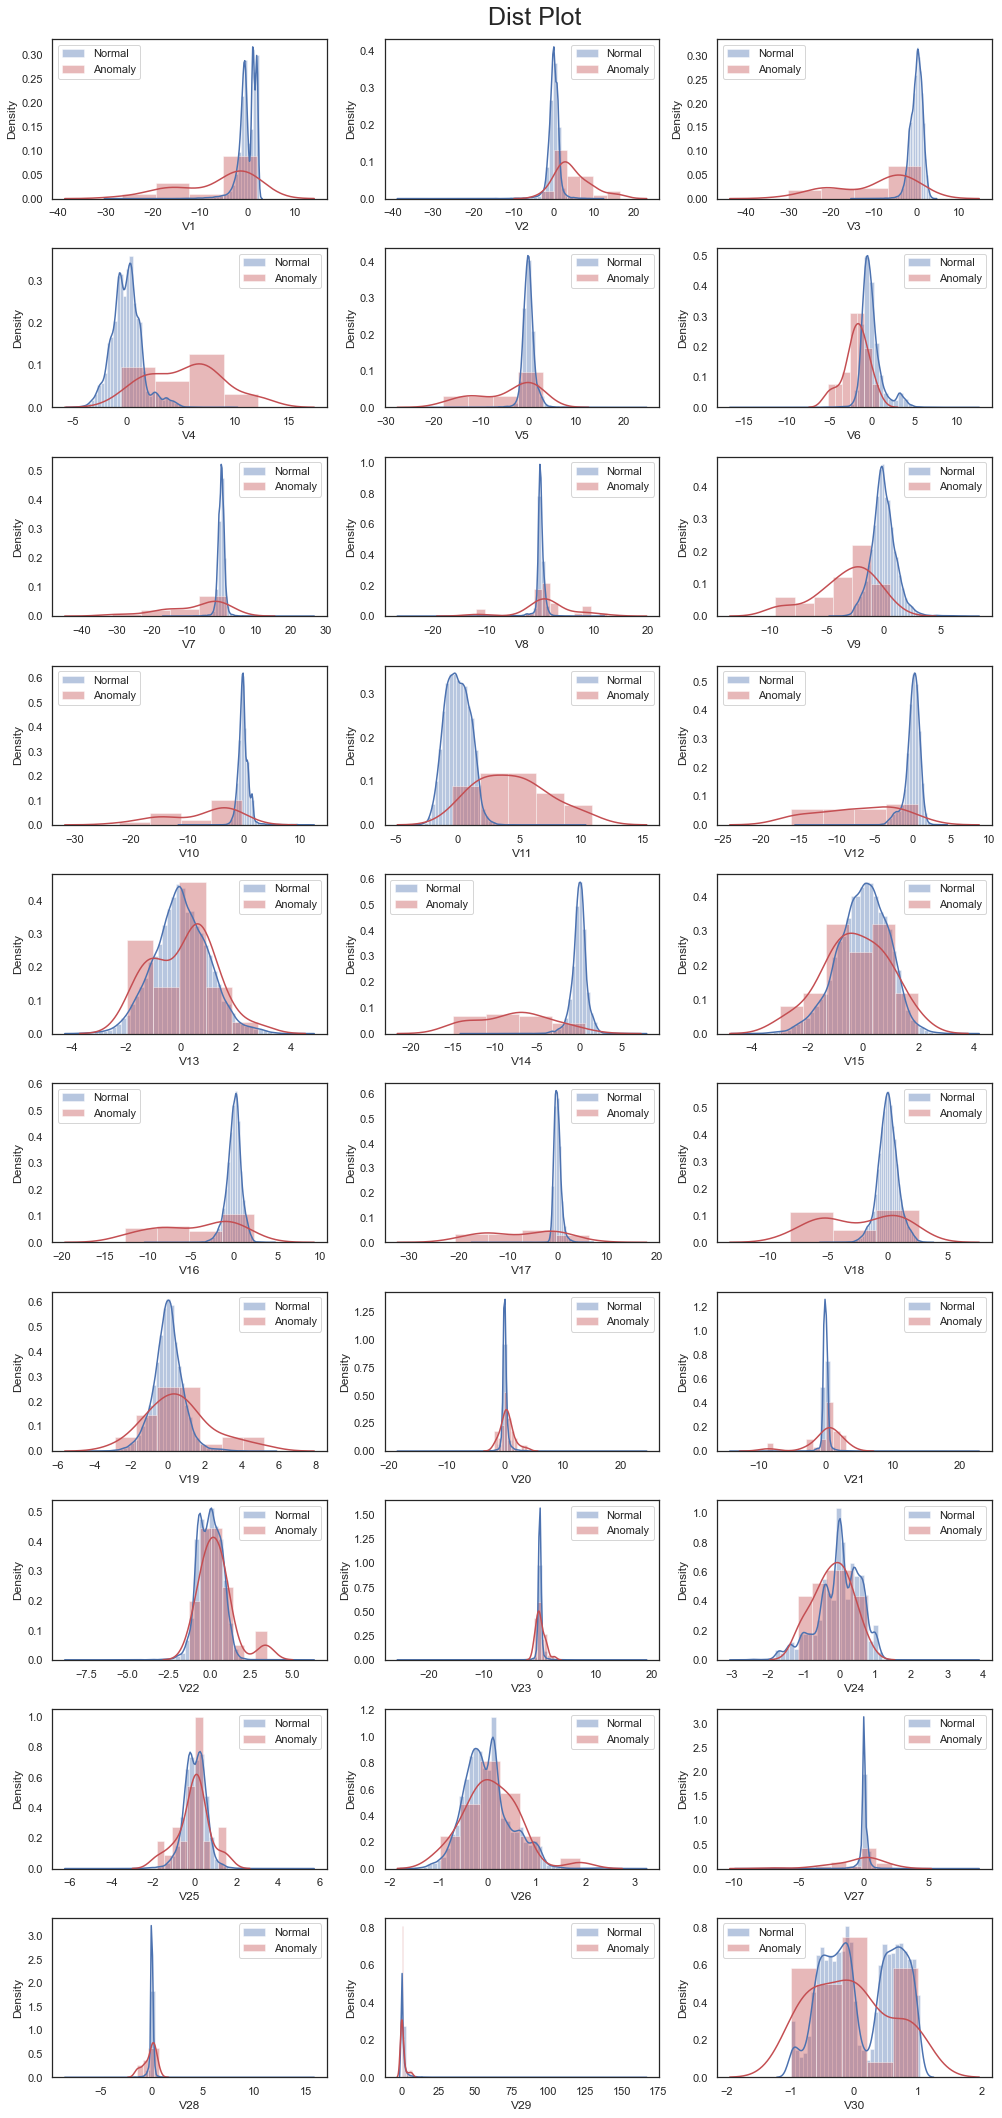

In [171]:
show_distplot(valid, row=10, column=3, target='Class')

`-` 정상 클래스의 분포는 V30을 제외하곤 종모양이다 (V30은 양봉분포)

`-` 비정상 클래스의 분포는 종모양인 경우와 분산이 큰 대칭인 분포인 경우가 존재한다

`-` 둘의 분포가 겹쳐있는 피쳐의 경우 클래스를 분류하는데 효과적이지 못할 것이다

- 다중공선성 판단

`-` 로지스틱 회귀를 통해 다중공선성을 판단하자

`-` 시도해봤는데 sigular matrix라서 모형 적합도 안된다

`-` 매우 심한 다중공선성 존재

## 비지도 학습

In [92]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report
from sklearn.covariance import MinCovDet, EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [53]:
SEED = 22

In [228]:
valid['Class'].value_counts() / len(valid)

0    0.998946
1    0.001054
Name: Class, dtype: float64

`-` 다변량 정규 분포를 이용하여 데이터 분포에 타원을 그린다

`-` 마할라노비스 거리를 이용

`-` 타원에서 벗어날수록 outlier이다

`-` 오염되지 않은 원래 데이터의 최소 공분산 행렬식을 얻기위해 기존에 데이터에서 샘플링할 비율을 정하자 (support_fraction)

`-` 전체 데이터에서 샘플링 비율만큼 데이터를 추출, 이를 여러번 수행하여 각 그룹에서 공분산 행렬식을 구하고 최소값을 MCD로 추정

`-` 위의 설명은 틀린 것일 수 있음

`-` support_fraction에 따라 f1 score가 천차만별이다 (값이 클수록 수행시간 오래걸림)

`-` 참고: https://stats.stackexchange.com/questions/475636/intuitive-explanation-of-minimum-covariance-determinant-mcd

In [400]:
cov = EllipticEnvelope(support_fraction=0.2, contamination=0.001054, random_state=SEED)

In [401]:
start = time.time()
cov.fit(train.drop(['ID', 'V29', 'V30'], axis=1))
end = time.time()
print(end - start)

28.58158254623413


In [402]:
y_pred = cov.predict(valid.drop(['ID', 'V29', 'V30', 'Class'], axis=1))

In [403]:
y_pred[y_pred == 1] = 0 ## 정상
y_pred[y_pred == -1] = 1 ## 비정상

In [404]:
len(y_pred[y_pred == 1])

26

In [405]:
print(classification_report(valid['Class'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.73      0.79        30

    accuracy                           1.00     28462
   macro avg       0.92      0.87      0.89     28462
weighted avg       1.00      1.00      1.00     28462



In [406]:
f1_score(y_pred,valid['Class'], average='macro')

0.8927516353661109

`-` test를 예측하자

In [407]:
test_pred = cov.predict(test.drop(['ID', 'V29', 'V30'], axis=1))

In [408]:
test_pred[test_pred == 1] = 0 ## 정상
test_pred[test_pred == -1] = 1 ## 비정상

In [409]:
len(test_pred[test_pred == 1])

299

In [410]:
submission['Class'] = test_pred

In [411]:
submission.to_csv('./Data/submssion2.csv', index=False)

`-` 점수는 $0.9269656921$

`-` support_fraction에 따른 valid 데이터에 대한 f1 score

In [340]:
f1_score_dict = {}

In [343]:
for sf in tqdm([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]):
    cov = EllipticEnvelope(support_fraction=sf, contamination=0.001054, random_state=SEED)
    cov.fit(train.drop(['ID', 'V29', 'V30'], axis=1))
    y_pred = cov.predict(valid.drop(['ID', 'V29', 'V30', 'Class'], axis=1))
    y_pred[y_pred == 1] = 0 ## 정상
    y_pred[y_pred == -1] = 1 ## 비정상
    f1_score_dict[sf] = f1_score(y_pred,valid['Class'], average='macro')

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [10:06<00:00, 55.09s/it]


In [344]:
f1_score_dict

{0.01: 0.6829992027762146,
 0.1: 0.49952523298751533,
 0.2: 0.8927516353661109,
 0.3: 0.6799849393552464,
 0.4: 0.8927516353661109,
 0.5: 0.785503270732222,
 0.6: 0.785503270732222,
 0.7: 0.7907068717738854,
 0.8: 0.7907068717738854,
 0.9: 0.7961028726986173,
 0.99: 0.8033779981712035}

`-` 범위를 더 세분화시키자

In [352]:
for sf in tqdm([0.15, 0.175, 0.225, 0.25, 0.275, 0.325, 0.35, 0.425]):
    cov = EllipticEnvelope(support_fraction=sf, contamination=0.001054, random_state=SEED)
    cov.fit(train.drop(['ID', 'V29', 'V30'], axis=1))
    y_pred = cov.predict(valid.drop(['ID', 'V29', 'V30', 'Class'], axis=1))
    y_pred[y_pred == 1] = 0 ## 정상
    y_pred[y_pred == -1] = 1 ## 비정상
    f1_score_dict[sf] = f1_score(y_pred,valid['Class'], average='macro')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [04:43<00:00, 35.45s/it]


In [353]:
f1_score_dict

{0.01: 0.6829992027762146,
 0.1: 0.49952523298751533,
 0.2: 0.8927516353661109,
 0.3: 0.6799849393552464,
 0.4: 0.8927516353661109,
 0.5: 0.785503270732222,
 0.6: 0.785503270732222,
 0.7: 0.7907068717738854,
 0.8: 0.7907068717738854,
 0.9: 0.7961028726986173,
 0.99: 0.8033779981712035,
 0.15: 0.6317325904405302,
 0.175: 0.4995340331627719,
 0.225: 0.49952523298751533,
 0.25: 0.4995604318317685,
 0.275: 0.6375617452765545,
 0.325: 0.8927516353661109,
 0.35: 0.6799849393552464,
 0.425: 0.49950763170851803}

`-` 샘플링 비율로 $0.325$가 좋아보임

`-` 근처 값들과의 f1 score 차이가 제일 적음

`-` 근데 public score는 $0.2$가 $0.325$보다 $0.002$더 높다

- 더 해볼 것

`-` 샘플링 비율 다르게 하고 앙상블하기

`-` 다른 모델과 앙상블하기

`-` 쓸모없어 보이는 피쳐 드랍하기